## Laboration 3 - Data Points - The Linear Classification.
**By:** Apti Dzhamurzaev

### Introduction
This report will analyze unlabelled data points and classify them using different linear functions. The goal is to determine which linear function gives out the most balanced classification.

### Start
Import the necessary libraries and then proceed to open and analyze the data from CSV file and then on extract its x and y values into separate arrays. Through the arrays recieve the correct m and k value.


In [6]:

import numpy as np
import matplotlib.pyplot as plt


from Lab3 import read_file_data


# i) -> iii)

   
# Creating variable with imported function using unlabelled_data.csv as a path
x_y = read_file_data("unlabelled_data.csv")


# Creating variables representing x and y varies separate and converting them to numpys array datatype to make it lighter in memory and more efficient towards upcoming polyfit\plot functions   
x_side = np.array([x for x, _ in x_y])
y_side = np.array([y for _, y in x_y])
k_o, m_o = np.polyfit(x_side, y_side, 1)

In [7]:
A = [["Ada", "Loveface"], ["John", "Marcus"]]
B = []

for fname, lname in A:
    B.append(fname)

### Additional lines for data classification
Its time to add these three costom lines to see if they provide better classification of the data points. They have there own slopes (k) and intercepts (m). Each line will be plotted.
-  f(x) = -0.489x 
-  g(x) = -2x + 0.16 
-  h(x) = 800x - 120 

### Data and linear equations
The orginal and costom lines will be visualized through matplotlib.

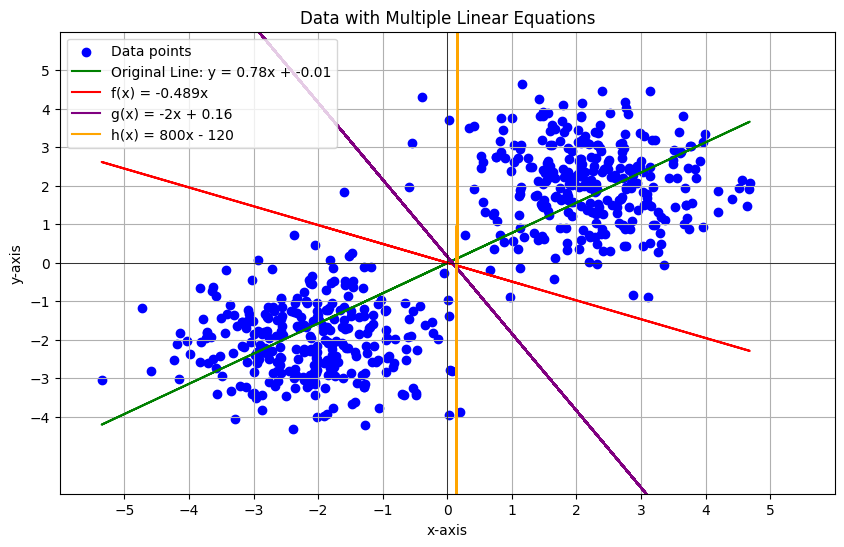

In [8]:
# New lines which will be plotted separately
k_f, m_f = -0.489, 0
k_g, m_g = -2, 0.16
k_h, m_h = 800, -120


# Changes the size of the plot figure, Adds dots. Adds the different linear lines with different color to show their differences. 
# Plots the line with costom color and line width and moves the legend to different side to make the dots more determinable on the axis.
plt.figure(figsize=(10, 6))  
plt.scatter(x_side, y_side, color="blue", label="Data points")
plt.plot(x_side, k_o * x_side + m_o, color="green", label=f"Original Line: y = {k_o:.2f}x + {m_o:.2f}")
plt.plot(x_side, k_f * x_side + m_f, color="red", label="f(x) = -0.489x")
plt.plot(x_side, k_g * x_side + m_g, color="purple", label="g(x) = -2x + 0.16")
plt.plot(x_side, k_h * x_side + m_h, color="orange", label="h(x) = 800x - 120")
plt.legend(loc='upper left')


# Labeling the axis and title
plt.xlabel("x-axis")        
plt.ylabel("y-axis")   
plt.title("Data with Multiple Linear Equations")


# Variables for the each axis lowest and highest values with increment of 1 and adding those inside ticks to make it more precise visable plt functions. Limits the coordinations visibiltiy between -6 to 6.
x_values = tuple(range(round(min(x_side)), round(max(x_side))+1))
y_values = tuple(range(round(min(y_side)), round(max(y_side))+1))
plt.xticks(x_values)
plt.yticks(y_values)
plt.xlim(-6,6)
plt.ylim(-6,6)


# Adds the grid and straight lines horizontal and vertical making it easier to see where the dots are in the axis.
plt.grid()
plt.axhline(0, color="black", lw=0.5)
plt.axvline(0, color="black", lw=0.5)


# Opens it to the screen
plt.show()

# Creating the function
The function will determine how ell each line classifices the data.


In [9]:

# Function which determines if a point is above\left on vetical line or below\right on vertical line on given line. The function is modified which is the reason not importing it from lab3.py.
def classify_points(xy, k, m):
    above = []
    below = []
    for x, y in xy:
        line_y = k * x + m
        if y > line_y:
            above.append((x, y))
        else:
            below.append((x, y))
    print(f" y = {k:.2f}x + {m:.2f} = The above amount: {len(above)}, The below amount: {len(below)}")
    return above, below


# Classify the points with inserted lines on each linear equation. The variables will be reusable assets if because of interest to plot them.
above_original, below_original = classify_points(x_y, k_o, m_o)  # original Line y(x)
above_f, below_f = classify_points(x_y, k_f, m_f)  # Line f(x)
above_g, below_g = classify_points(x_y, k_g, m_g)  # Line g(x)
above_h, below_h = classify_points(x_y, k_h, m_h)  # Line h(x)



 y = 0.78x + -0.01 = The above amount: 310, The below amount: 290
 y = -0.49x + 0.00 = The above amount: 301, The below amount: 299
 y = -2.00x + 0.16 = The above amount: 301, The below amount: 299
 y = 800.00x + -120.00 = The above amount: 302, The below amount: 298


### The Results
We classified the data using the original line and three additional lines. Below are the results of the classification:

**Original Line y(x)**: The original line appears to split the data least evenly.

**Line f(x) = -0.489x**: This line appears to split the data more evenly a good classifier in this case.

**Line g(x) = -2x + 0.16**: This line appears to split the data the same as f(x).

**Line h(x) = 800x - 120**: This line appears to split data less evenly than f(x) and g(x) but more evenly than the original line.

### Conclusion
The choice of the line depends on the goal of classification. If we want to even the balance of data points on each classification (above or below) then the costom lines seems to be a better choice as they split data more evenly. But overall there isnt any solid reason to prefer any specific line that doesnt cut specificly directly any point.


### Optional for my own interest 
The below code is created because of interest to see each classified points as above or below visually on plot.

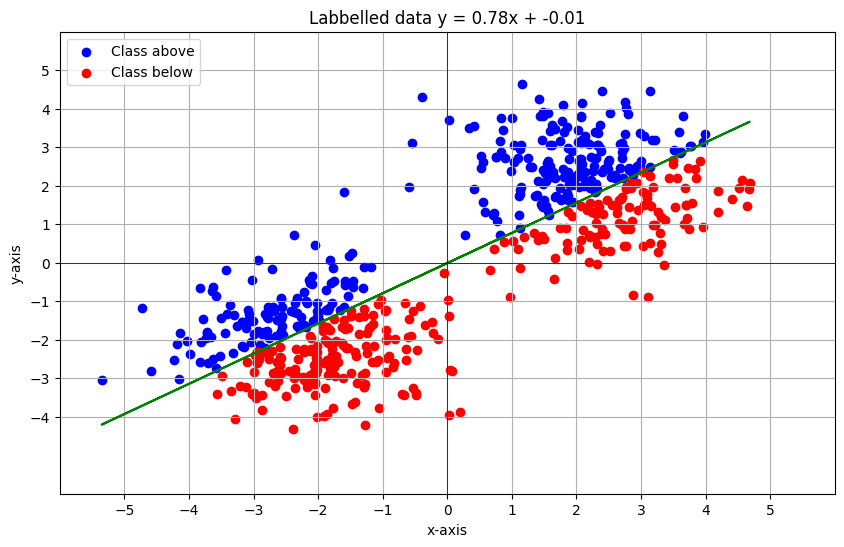

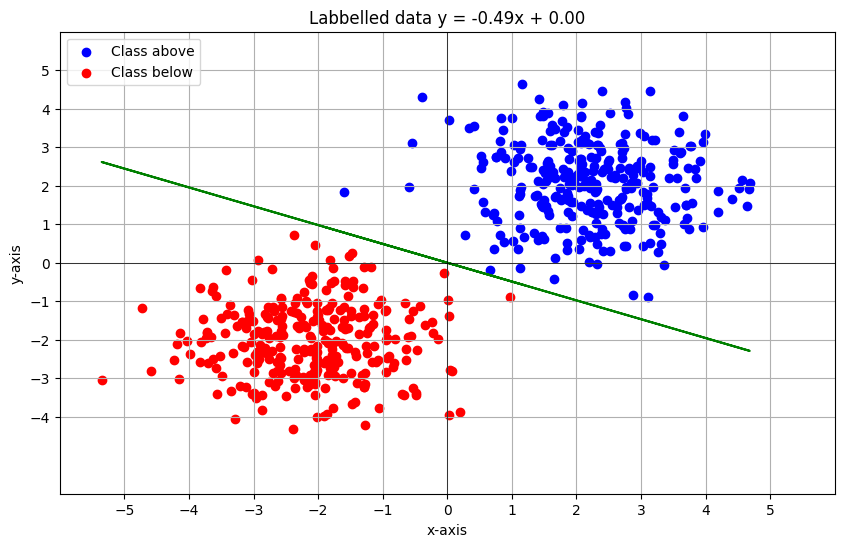

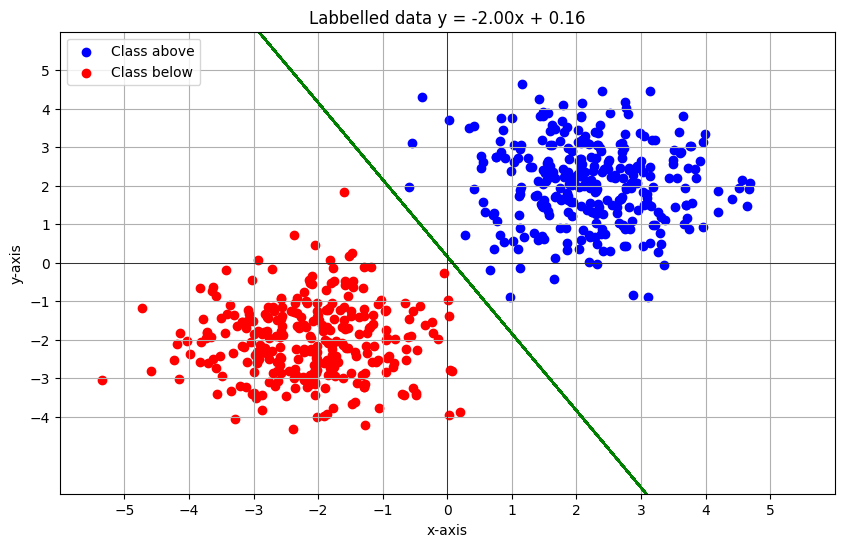

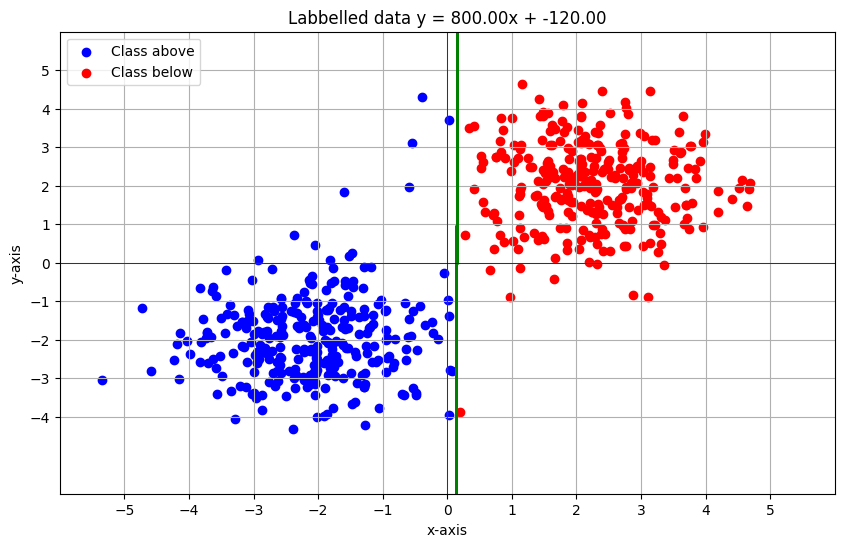

In [10]:
# Creating the function to split the axis                          
def split_labelled_points(above_xy, below_xy):
    above_x = [x for x, _ in above_xy]      
    above_y = [y for _, y in above_xy]      
    below_x = [x for x, _ in below_xy]      
    below_y = [y for _, y in below_xy]
    return above_x, above_y, below_x, below_y

# Creating the variables through the function to get the each above and below for both axis for every used line.
above_x_o, above_y_o, below_x_o, below_y_o = split_labelled_points(above_original, below_original)
above_x_f, above_y_f, below_x_f, below_y_f = split_labelled_points(above_f, below_f)   
above_x_g, above_y_g, below_x_g, below_y_g = split_labelled_points(above_g, below_g)   
above_x_h, above_y_h, below_x_h, below_y_h = split_labelled_points(above_h, below_h)   

# Creating the plot function to be able to plot for each lined in labbelled points 
def plot_labbeled_points(above_x, above_y, below_x, below_y, k, m):
    plt.figure(figsize=(10, 6))  
    plt.scatter(above_x, above_y, color="blue", label="Class above")
    plt.scatter(below_x, below_y, color="red", label="Class below")
    plt.plot(x_side, k * x_side + m, color ="green")
    plt.legend(loc='upper left')


    plt.xlabel("x-axis")        
    plt.ylabel("y-axis")   
    plt.title(f"Labbelled data y = {k:.2f}x + {m:.2f}")


    x_values = tuple(range(round(min(x_side)), round(max(x_side))+1))
    y_values = tuple(range(round(min(y_side)), round(max(y_side))+1))
    plt.xticks(x_values)
    plt.yticks(y_values)
    plt.xlim(-6,6)
    plt.ylim(-6,6)
   

    plt.grid()
    plt.axhline(0, color="black", lw=0.5)
    plt.axvline(0, color="black", lw=0.5)


    plt.show()

# Calling the function and creating the plot for each line
plot_labbeled_points(above_x_o, above_y_o, below_x_o, below_y_o, k_o, m_o)
plot_labbeled_points(above_x_f, above_y_f, below_x_f, below_y_f, k_f, m_f)
plot_labbeled_points(above_x_g, above_y_g, below_x_g, below_y_g, k_g, m_g)
plot_labbeled_points(above_x_h, above_y_h, below_x_h, below_y_h, k_h, m_h)